In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.feature_selection import mutual_info_regression

In [2]:
train_data = pd.read_csv('C:/Users/tun20/Desktop/Hackathons/AI Hackflow/Train.csv')
test_data = pd.read_csv('C:/Users/tun20/Desktop/Hackathons/AI Hackflow/Test.csv')
sample_data = pd.read_csv('C:/Users/tun20/Desktop/Hackathons/AI Hackflow/SampleSubmission.csv')

In [3]:
train_data.head()

,building,File,Cooling Setpoint,EUI,Cooling COP,Operating Hours,WWR,Equipment Heat Gain,Internal Wall Rt,Internal Floor Rt,...,Wall Rt,Start Time,windows g-value,Roof Rt,Boiler Efficiency,Internal Mass,Permeability,Total Floors Area,random load mesures,Operational Energy
0,Building_0,Shape0_10851,26.804565,37.155511,4.430542,12.166667,"(0.771636962890625,0.436004638671875,0.5746520...",15.463379,2.511920,1.919918,...,4.640045,8.778931,0.381354,2.912090,0.921890,44.441528,3.942261,18210.25,"{'Cooling': '6743.0007375945:C', 'Lights': '10...",135322.229618
1,Building_10,Shape0_11866,25.219604,64.131327,2.855347,9.166667,"(0.451275634765625,0.061151123046875,0.2780212...",11.646973,2.080851,2.822443,...,3.621094,8.131470,0.556696,4.019824,0.908726,41.702271,5.122925,13110.25,"{'Cooling': '6485.8495970786:C', 'Lights': '31...",168155.546796
2,Building_10001,Shape0_15816,26.691040,31.992473,2.863892,10.166667,"(0.324163818359375,0.669464111328125,0.6951721...",9.899902,2.274071,2.341140,...,4.595792,7.406128,0.572552,5.745949,0.911157,24.244995,4.495239,13561.60,"{'Cooling': '3861.976104307:C', 'Lights': '486...",108467.281862
3,Building_10002,Shape0_15566,25.468384,40.932114,3.922485,10.333333,"(0.772406005859375,0.924346923828125,0.5703674...",12.196777,2.541613,2.390324,...,5.310859,7.831909,0.520404,4.394614,0.929751,24.655151,6.311646,21678.00,"{'Cooling': '10788.0922449597:C', 'Lights': '7...",177465.271945
4,Building_10003,Shape0_3155,25.152832,57.792356,2.828613,10.833333,"(0.3538818359375,0.2387451171875,0.07746582031...",12.552734,1.586183,2.228146,...,4.190710,8.794434,0.475854,5.271557,0.947480,29.201660,7.530762,14200.16,"{'Cooling': '4314.2210067885:C', 'Lights': '59...",205165.175932


In [4]:
train_data.describe()

,Cooling Setpoint,EUI,Cooling COP,Operating Hours,Equipment Heat Gain,Internal Wall Rt,Internal Floor Rt,Infiltration,Ground Floor Rt,Number of Floors,...,Town,Wall Rt,Start Time,windows g-value,Roof Rt,Boiler Efficiency,Internal Mass,Permeability,Total Floors Area,Operational Energy
count,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,...,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000,54600.000000
mean,26.000114,56.713766,3.499182,11.318828,12.000162,2.063230,2.063373,0.270585,4.237292,4.484780,...,1.000000,4.235788,7.999593,0.449978,4.235396,0.939971,29.985699,6.001596,14306.061487,165252.370240
std,0.577127,12.760431,0.577278,1.796210,2.307975,0.371027,0.371210,0.057913,1.049585,1.156924,...,0.816504,1.048261,0.577424,0.086571,1.047853,0.023109,8.662488,1.731537,7922.612042,65056.005167
min,25.000000,23.014628,2.500000,8.000000,8.000000,1.538483,1.538483,0.163000,2.857184,2.000000,...,0.000000,2.857193,7.000000,0.300000,2.857292,0.900000,15.000000,3.000000,1999.880000,32780.873847
25%,25.499985,47.437526,2.999603,9.833333,10.001282,1.739241,1.739068,0.225000,3.333147,4.000000,...,0.000000,3.333622,7.499008,0.375025,3.333316,0.919938,22.470932,4.502838,7320.500000,113395.250360
50%,25.999786,55.786021,3.498932,11.333333,11.999146,1.999689,1.999799,0.266000,4.000098,5.000000,...,1.000000,3.998780,7.999969,0.449913,3.999268,0.939963,29.985809,6.003937,12943.840000,159507.258354
75%,26.499893,64.999304,3.998978,12.833333,13.996948,2.352675,2.352599,0.309000,5.002175,5.000000,...,2.000000,4.998360,8.498764,0.524993,4.998741,0.960001,37.495193,7.501144,20323.500000,210194.386728
max,26.999939,113.635186,4.499939,14.833333,15.999756,2.857143,2.857143,0.520000,6.666667,6.000000,...,2.000000,6.666667,8.999939,0.599991,6.666667,0.979998,44.998169,8.999634,30000.960000,423444.390589


In [5]:
train_data.dropna()

,building,File,Cooling Setpoint,EUI,Cooling COP,Operating Hours,WWR,Equipment Heat Gain,Internal Wall Rt,Internal Floor Rt,...,Wall Rt,Start Time,windows g-value,Roof Rt,Boiler Efficiency,Internal Mass,Permeability,Total Floors Area,random load mesures,Operational Energy
0,Building_0,Shape0_10851,26.804565,37.155511,4.430542,12.166667,"(0.771636962890625,0.436004638671875,0.5746520...",15.463379,2.511920,1.919918,...,4.640045,8.778931,0.381354,2.912090,0.921890,44.441528,3.942261,18210.25,"{'Cooling': '6743.0007375945:C', 'Lights': '10...",135322.229618
1,Building_10,Shape0_11866,25.219604,64.131327,2.855347,9.166667,"(0.451275634765625,0.061151123046875,0.2780212...",11.646973,2.080851,2.822443,...,3.621094,8.131470,0.556696,4.019824,0.908726,41.702271,5.122925,13110.25,"{'Cooling': '6485.8495970786:C', 'Lights': '31...",168155.546796
2,Building_10001,Shape0_15816,26.691040,31.992473,2.863892,10.166667,"(0.324163818359375,0.669464111328125,0.6951721...",9.899902,2.274071,2.341140,...,4.595792,7.406128,0.572552,5.745949,0.911157,24.244995,4.495239,13561.60,"{'Cooling': '3861.976104307:C', 'Lights': '486...",108467.281862
3,Building_10002,Shape0_15566,25.468384,40.932114,3.922485,10.333333,"(0.772406005859375,0.924346923828125,0.5703674...",12.196777,2.541613,2.390324,...,5.310859,7.831909,0.520404,4.394614,0.929751,24.655151,6.311646,21678.00,"{'Cooling': '10788.0922449597:C', 'Lights': '7...",177465.271945
4,Building_10003,Shape0_3155,25.152832,57.792356,2.828613,10.833333,"(0.3538818359375,0.2387451171875,0.07746582031...",12.552734,1.586183,2.228146,...,4.190710,8.794434,0.475854,5.271557,0.947480,29.201660,7.530762,14200.16,"{'Cooling': '4314.2210067885:C', 'Lights': '59...",205165.175932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,Building_9992,Shape0_14205,25.408325,63.043619,3.872192,10.333333,"(0.889080810546875,0.498736572265625,0.2994445...",9.901855,2.779069,1.589646,...,5.896495,8.347046,0.409735,5.934082,0.924028,23.314819,6.210571,11026.24,"{'Cooling': '4817.8812345313:C', 'Lights': '86...",173783.517217
54596,Building_9993,Shape0_20612,25.150330,52.031822,2.593689,13.000000,"(0.735739135742188,0.707504272460938,0.3488006...",10.283936,1.890247,1.951719,...,4.930336,8.463562,0.529129,5.935157,0.926541,32.026062,4.032898,13899.20,"{'Cooling': '8970.7636194456:C', 'Lights': '86...",180800.175570
54597,Building_9994,Shape0_12286,26.598511,64.868078,3.460815,14.333333,"(0.435455322265625,0.242205810546875,0.3606384...",8.287598,2.565733,2.496305,...,3.282183,8.393188,0.476422,4.655868,0.969507,18.088989,7.244019,13344.80,"{'Cooling': '2182.6635332645:C', 'Lights': '65...",216412.881062
54598,Building_9995,Shape0_10572,25.040894,45.606632,4.498901,9.333333,"(0.902593994140625,0.523016357421875,0.3628356...",9.830566,1.811888,1.637205,...,4.140929,8.894165,0.524615,5.439936,0.926499,39.080200,4.815308,21601.00,"{'Cooling': '10687.6493568836:C', 'Lights': '1...",197029.771099


c:\Users\tun20\.conda\envs\dlia\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Operational Energy'>

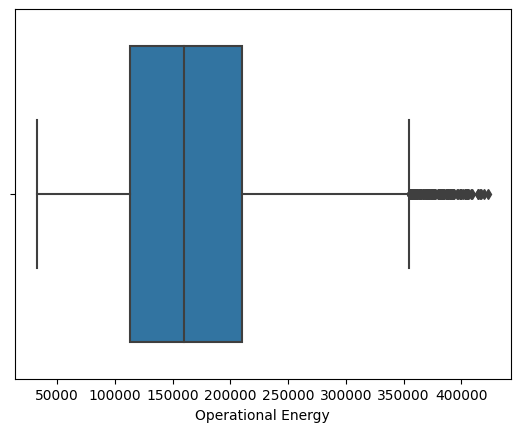

In [6]:
sns.boxplot(train_data['Operational Energy'])

c:\Users\tun20\.conda\envs\dlia\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EUI'>

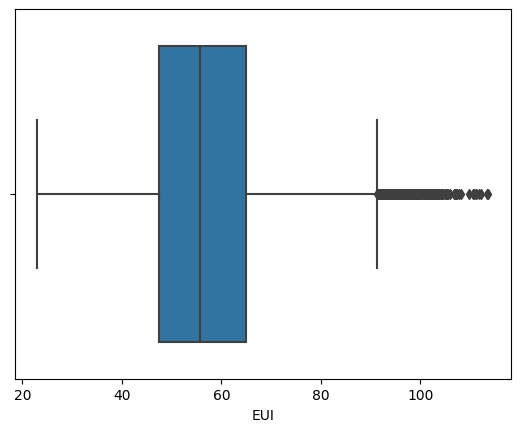

In [7]:
sns.boxplot(train_data['EUI'])

In [16]:
# calculate the correlation matrix
corr_matrix = train_data.corr()
# corr_matrix

<AxesSubplot:>

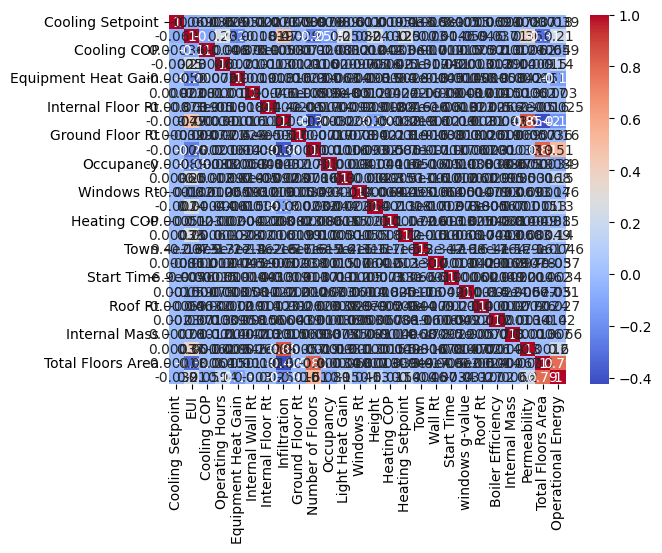

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [10]:
corr_matrix = train_data.loc[:, ['EUI', 'Total Floors Area', 'Number of Floors']].corr()


<AxesSubplot:>

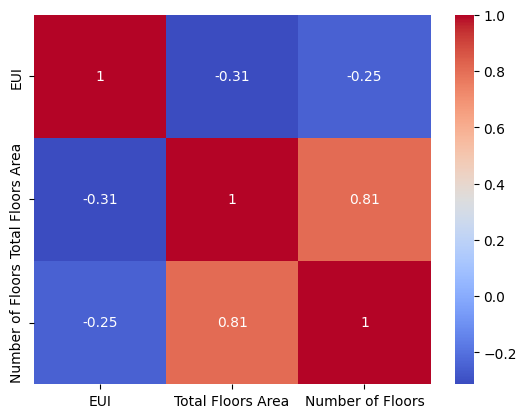

In [11]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [13]:
corr_matrix = train_data.loc[:, ['Operational Energy', 'EUI', 'Total Floors Area', 'Number of Floors']].corr()


<AxesSubplot:>

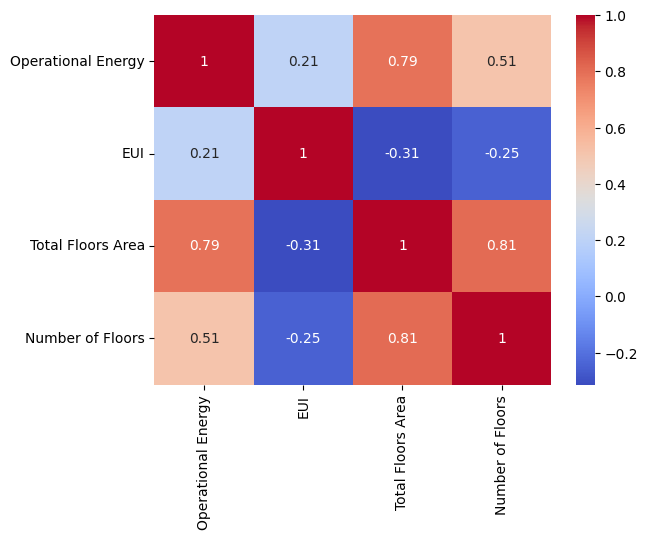

In [14]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')